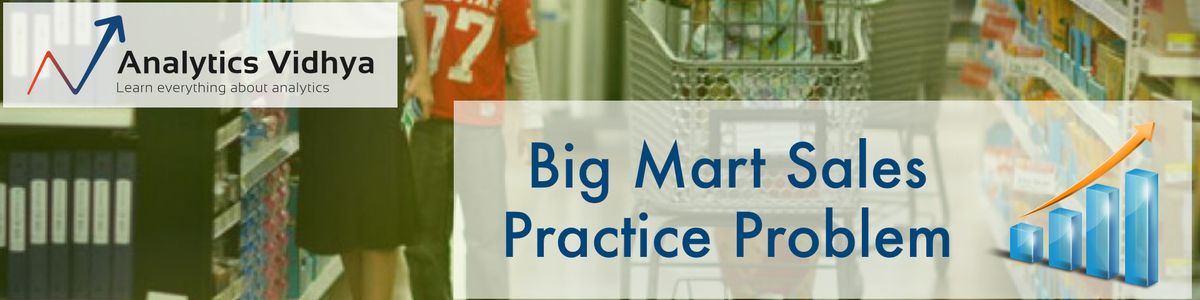

# 1. Importing the requeried libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import metrics


# 2.Loading the data set

In [2]:
dataframe=pd.read_csv("train_v9rqX0R.csv")


# 3.Applaying some of the basic operation of pandas

In [3]:
def opearations():
    a=[dataframe.head(),dataframe.tail(),dataframe.columns,dataframe.nunique(),dataframe.describe(),dataframe.info(),lambda:dataframe.isnull().sum()]
    for i in a:
        if callable(i):
            print(i())
        else:
            print(i)
            
opearations()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
  Item_Identifier  Item_Weight Item_Fat_Conte

In [4]:
dataframe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
dataframe.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [6]:
dataframe.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
dataframe.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [9]:
dataframe.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
dataframe.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Checking the null value percentage on the null values columns

In [11]:
null_vaper=(dataframe.isnull().sum()/len(dataframe))*100
null_vaper

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [12]:
dataframe["Item_Weight"].unique()

array([ 9.3  ,  5.92 , 17.5  , 19.2  ,  8.93 , 10.395, 13.65 ,    nan,
       16.2  , 11.8  , 18.5  , 15.1  , 17.6  , 16.35 ,  9.   , 13.35 ,
       18.85 , 14.6  , 13.85 , 13.   ,  7.645, 11.65 ,  5.925, 19.25 ,
       18.6  , 18.7  , 17.85 , 10.   ,  8.85 ,  9.8  , 13.6  , 21.35 ,
       12.15 ,  6.42 , 19.6  , 15.85 ,  7.39 , 10.195,  9.895, 10.895,
        7.905,  9.195,  8.365,  7.97 , 17.7  , 19.35 ,  8.645, 15.6  ,
       18.25 ,  7.855,  7.825,  8.39 , 12.85 , 19.   ,  5.905,  7.76 ,
       16.75 , 15.5  ,  6.055,  6.305, 20.85 , 20.75 ,  8.895, 19.7  ,
        8.75 , 13.3  ,  8.31 , 19.75 , 17.1  , 10.5  ,  6.635, 14.15 ,
        8.89 ,  9.1  ,  7.5  , 16.85 ,  7.485, 11.6  , 12.65 , 20.25 ,
        8.6  , 12.6  ,  8.88 , 20.5  , 13.5  ,  7.235,  6.92 ,  8.02 ,
       12.8  , 16.6  , 14.   , 16.   , 21.25 ,  7.365, 18.35 ,  5.465,
        7.27 ,  6.155, 19.5  , 15.2  , 14.5  , 13.1  , 12.3  , 11.1  ,
       11.3  ,  5.75 , 11.35 ,  6.525, 10.3  ,  5.78 , 11.85 , 18.75 ,
      

checking the null value using the bar plot

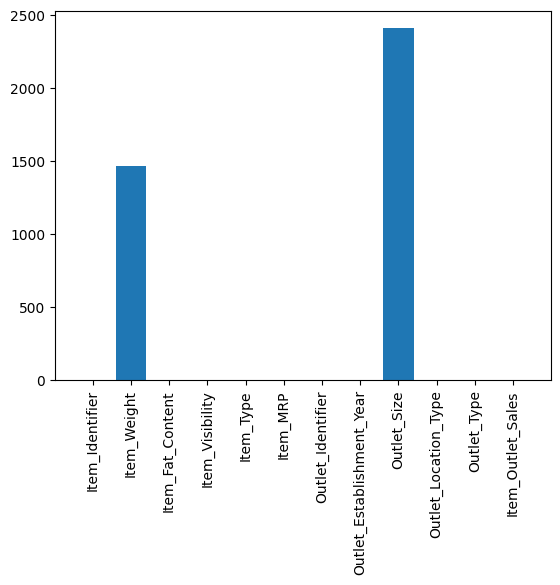

In [13]:
null_=dataframe.isnull().sum()
plt.bar(null_.index,null_.values)
plt.xticks(rotation=90)
plt.show()

In [14]:
dataframe["Item_Weight"]=dataframe["Item_Weight"].fillna(dataframe['Item_Weight'].mean())

In [15]:
dataframe['Item_Weight'].isnull().sum()

0

In [16]:
dataframe.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [17]:
dataframe['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [18]:
dataframe['Outlet_Size']=dataframe['Outlet_Size'].fillna("unknown")

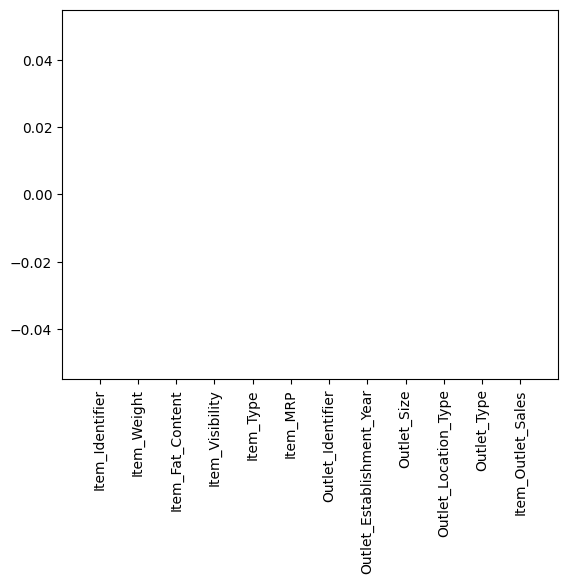

In [19]:
null_=dataframe.isnull().sum()
plt.bar(null_.index,null_.values)
plt.xticks(rotation=90)
plt.show()

# 4.Checking the outlier in the dataframe

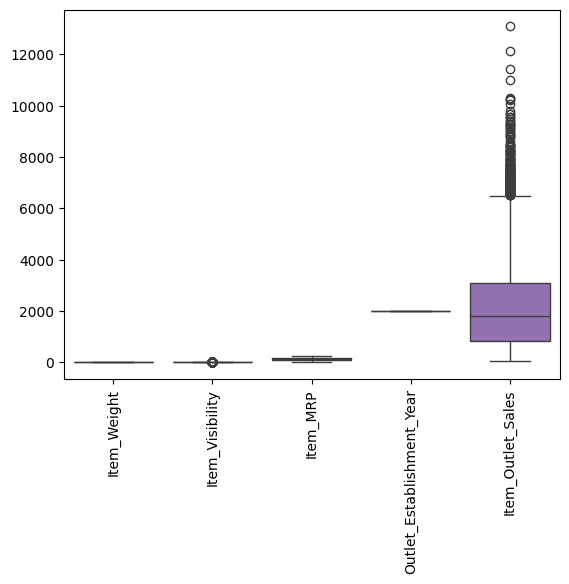

In [20]:
sns.boxplot(data=dataframe)
plt.xticks(rotation=90)
plt.show()

In [21]:
# Calculate the interquartile range (IQR)
Q1 = dataframe['Item_Outlet_Sales'].quantile(0.25)
Q3 = dataframe['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = ((dataframe['Item_Outlet_Sales'] < lower_bound) | (dataframe['Item_Outlet_Sales'] > upper_bound)).sum()

# Calculate the percentage of outliers
outliers_percentage = (outliers_count / len(dataframe)) * 100

print("Percentage of outliers:", outliers_percentage)


Percentage of outliers: 2.1823301654347063


In [22]:
# Calculating IQR
Q1 = dataframe['Item_Outlet_Sales'].quantile(0.25)
Q3 = dataframe['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1
# Setting threshold for IQR
threshold = 1.5
# Filtering outliers
df_no_outliers = dataframe[(dataframe['Item_Outlet_Sales'] >= Q1 - threshold*IQR) & (dataframe['Item_Outlet_Sales'] <= Q3 + threshold*IQR)]
print("DataFrame after removing outliers using IQR:")
df_no_outliers


DataFrame after removing outliers using IQR:


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,unknown,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [23]:
# Calculate the interquartile range (IQR)
Q1 = df_no_outliers['Item_Outlet_Sales'].quantile(0.25)
Q3 = df_no_outliers['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = ((df_no_outliers['Item_Outlet_Sales'] < lower_bound) | (df_no_outliers['Item_Outlet_Sales'] > upper_bound)).sum()

# Calculate the percentage of outliers
outliers_percentage = (outliers_count / len(dataframe)) * 100

print("Percentage of outliers:", outliers_percentage)


Percentage of outliers: 0.4575853572685674


So the outliers are in the less than 3% is neglisable

# 5.checking the correlation of each column

In [24]:
# Select only numeric columns
numeric_df = df_no_outliers.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Display the correlation matrix
correlation_matrix


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.011738,0.025420,-0.009169,0.012866
Item_Visibility,-0.011738,1.000000,0.003848,-0.081398,-0.131628
Item_MRP,0.025420,0.003848,1.000000,0.024550,0.553334
Outlet_Establishment_Year,-0.009169,-0.081398,0.024550,1.000000,0.007101
Item_Outlet_Sales,0.012866,-0.131628,0.553334,0.007101,1.000000


In [25]:
dataframe.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


# 6.Using the encoding

In [26]:
label_encoder=LabelEncoder()
for column in ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Identifier','Outlet_Identifier']:
    df_no_outliers[column]=label_encoder.fit_transform(df_no_outliers[column])
df_no_outliers

C:\Users\DELL\AppData\Local\Temp\ipykernel_6072\419331106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[column]=label_encoder.fit_transform(df_no_outliers[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_6072\419331106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[column]=label_encoder.fit_transform(df_no_outliers[column])
C:\Users\DELL\AppData\Local\Temp\ipykernel_6072\419331106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [27]:
#df_no_outliers.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)
#df_no_outliers

In [28]:
#df=df_no_outliers.drop(columns=['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type'])
#df

In [29]:
#df_no_outliers.columns

df_no_outliers.drop(columns=['Outlet_Establishment_Year','Outlet_Location_Type'],inplace=True)
df_no_outliers

In [30]:
df_no_outliers.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044646,-0.099225,-0.024277,-0.017106,0.011698,-0.009857,-0.012592,0.001673,0.003868,-0.002655,0.001714
Item_Weight,0.044646,1.000000,-0.018188,-0.011738,0.029907,0.025420,-0.008109,-0.009169,-0.015583,0.003816,-0.001093,0.012866
Item_Fat_Content,-0.099225,-0.018188,1.000000,0.033936,-0.113901,0.000065,-0.001204,-0.001355,-0.005492,-0.004032,-0.003031,0.012301
Item_Visibility,-0.024277,-0.011738,0.033936,1.000000,-0.036736,0.003848,-0.102116,-0.081398,0.086637,-0.025523,-0.174368,-0.131628
Item_Type,-0.017106,0.029907,-0.113901,-0.036736,1.000000,0.035217,0.000917,0.005464,0.000988,0.002903,0.002805,0.018177
Item_MRP,0.011698,0.025420,0.000065,0.003848,0.035217,1.000000,0.001499,0.024550,0.007148,-0.013488,-0.033936,0.553334
Outlet_Identifier,-0.009857,-0.008109,-0.001204,-0.102116,0.000917,0.001499,1.000000,0.081251,0.053204,-0.722075,0.101306,0.181168
Outlet_Establishment_Year,-0.012592,-0.009169,-0.001355,-0.081398,0.005464,0.024550,0.081251,1.000000,0.461461,-0.068123,-0.084180,0.007101
Outlet_Size,0.001673,-0.015583,-0.005492,0.086637,0.000988,0.007148,0.053204,0.461461,1.000000,-0.282590,-0.428695,-0.167440
Outlet_Location_Type,0.003868,0.003816,-0.004032,-0.025523,0.002903,-0.013488,-0.722075,-0.068123,-0.282590,1.000000,0.455670,0.057946


<Axes: >

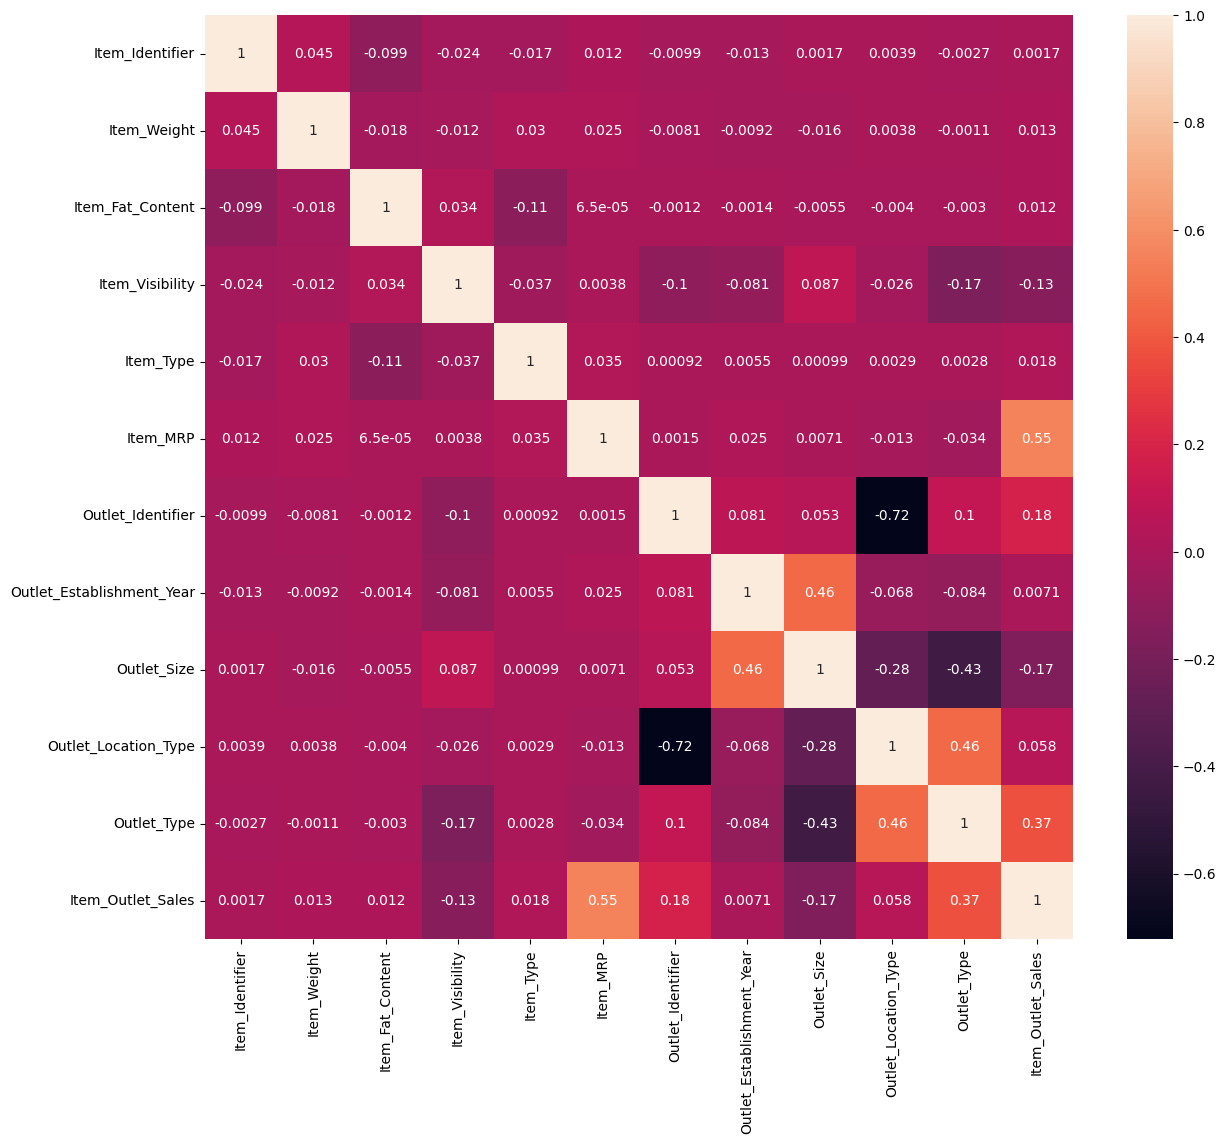

In [31]:
plt.figure(figsize=(14,12))
sns.heatmap(df_no_outliers.corr(), annot=True)

# 7.Creating the models

linear regression 

In [32]:
X=df_no_outliers.iloc[:,:-1].values
y=df_no_outliers.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2=r2_score(y_test,y_pred)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared (R2):',r2)


Mean Absolute Error: 1.3706754889104816e-13
Mean Squared Error: 1.884375549329602e-26
Root Mean Squared Error: 1.3727255914164353e-13
R-squared (R2): 1.0


In [33]:
X=df_no_outliers.iloc[:,:-1].values
y=df_no_outliers.iloc[:,1].values
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=0)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2=r2_score(y_test,y_pred)
print('Mean Absolute Error:', mae)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R-squared (R2):',r2)

Mean Absolute Error: 0.00026339928060460616
Mean Squared Error: 1.075657973623794e-06
Root Mean Squared Error: 0.0010371393221856907
R-squared (R2): 0.9999999412630498


In [34]:
df1 = dataframe.copy()
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,unknown,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, adjusted_rand_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score


def run_regression_models():
    # Split data into features (X) and target variable (y)
#     X = df_no_outliers.drop(columns=["Item_Outlet_Sales"])
#     y = df_no_outliers["Item_Outlet_Sales"]

    X=df_no_outliers.iloc[:,:-1].values
    y=df_no_outliers.iloc[:,1].values
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Initialize regression models
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Random Forest Regression": RandomForestRegressor(),
        "Support Vector Regression": SVR(),
        "Decision Tree Regression": DecisionTreeRegressor()
    }
    
    # Dictionary to store evaluation metrics for each model
    results = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        adjr = adjusted_rand_score(y_test, y_pred)
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        cv_mse = -np.mean(cv_scores)  # Negative because sklearn returns negative MSE

        # Store results in the dictionary
        results[name] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R^2': r2 ,'cv':cv_mse,'adjr':adjr }
    
    return results

# Example usage:
# Replace "target_column" with the name of your target variable column
results = run_regression_models()
for model, metrics in results.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
        print("=" * 30)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discr

Linear Regression:
MSE: 4.701218598298848e-26
MAE: 2.1667559832680807e-13
RMSE: 2.168229369393111e-13
R^2: 1.0
cv: 3.153322029066188e-26
adjr: 0.14002156979330974
Ridge Regression:
MSE: 1.1722269961766203e-09
MAE: 2.7533768869517796e-05
RMSE: 3.4237800691291784e-05
R^2: 0.999999999932114
cv: 1.2551669596365724e-09
adjr: 0.0
Lasso Regression:
MSE: 0.05187180295908057
MAE: 0.182357916604356
RMSE: 0.22775382095385482
R^2: 0.9969959984720566
cv: 0.05549733898445035
adjr: 0.025495903463566966
Random Forest Regression:
MSE: 1.6839823141508033e-06
MAE: 0.0002808453237717552
RMSE: 0.0012976834414258369
R^2: 0.9999999024771619
cv: 1.9508254523569812e-06
adjr: 0.9958702488851894
Support Vector Regression:
MSE: 16.907816696353624
MAE: 3.2809724321514184
RMSE: 4.111911562321547
R^2: 0.020833973515436255
cv: 17.690578823411037
adjr: 0.0
Decision Tree Regression:
MSE: 1.2589928057554697e-06
MAE: 7.194244608635667e-05
RMSE: 0.0011220484863656605
R^2: 0.999999927089168
cv: 5.74323624483743e-06
adjr: 0

df_no_outliers

label_encoder=LabelEncoder()
for column in ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']:
    df[column]=label_encoder.fit_transform(df_no_outliers[column])
df_no_outliers

In [36]:
df1 = df_no_outliers.copy()
df1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [37]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8337 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8337 non-null   int32  
 1   Item_Weight                8337 non-null   float64
 2   Item_Fat_Content           8337 non-null   int32  
 3   Item_Visibility            8337 non-null   float64
 4   Item_Type                  8337 non-null   int32  
 5   Item_MRP                   8337 non-null   float64
 6   Outlet_Identifier          8337 non-null   int32  
 7   Outlet_Establishment_Year  8337 non-null   int64  
 8   Outlet_Size                8337 non-null   int32  
 9   Outlet_Location_Type       8337 non-null   int32  
 10  Outlet_Type                8337 non-null   int32  
 11  Item_Outlet_Sales          8337 non-null   float64
dtypes: float64(4), int32(7), int64(1)
memory usage: 618.8 KB


In [38]:
cat = df1.select_dtypes(include='O')
le = LabelEncoder()

for i in cat:
    df1[i] = le.fit_transform(df[i])
    
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.200,2,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,897,8.380,2,0.046982,0,108.1570,7,2002,3,1,1,549.2850
8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, adjusted_rand_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.model_selection import cross_val_score


def run_regression_models():
    # Split data into features (X) and target variable (y)
#     X = df_no_outliers.drop(columns=["Item_Outlet_Sales"])
#     y = df_no_outliers["Item_Outlet_Sales"]

    X=df1.iloc[:,:-1].values
    y=df1.iloc[:,1].values
    
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    
    # Initialize regression models
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Random Forest Regression": RandomForestRegressor(),
        "Support Vector Regression": SVR(),
        "Decision Tree Regression": DecisionTreeRegressor()
    }
    
    # Dictionary to store evaluation metrics for each model
    results = {}
    
    # Train and evaluate each model
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        adjr = adjusted_rand_score(y_test, y_pred)
        cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
        cv_mse = -np.mean(cv_scores)  # Negative because sklearn returns negative MSE

        # Store results in the dictionary
        results[name] = {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'R^2': r2 ,'cv':cv_mse,'adjr':adjr }
    
    return results

# Example usage:
# Replace "target_column" with the name of your target variable column
results = run_regression_models()
for model, metrics in results.items():
    print(f"{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
        print("=" * 30)

C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and continuous values for target
  warnings.warn(msg, UserWarning)
C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discr

Linear Regression:
MSE: 1.69953051015404e-27
MAE: 3.364570368472337e-14
RMSE: 4.1225362462373086e-14
R^2: 1.0
cv: 3.153322029066188e-26
adjr: 0.04227361306777266
Ridge Regression:
MSE: 1.5727784855108363e-09
MAE: 3.1924909917842145e-05
RMSE: 3.965827133790423e-05
R^2: 0.9999999999105543
cv: 1.2551669596365724e-09
adjr: 0.0
Lasso Regression:
MSE: 0.0531155325184205
MAE: 0.18475030695164904
RMSE: 0.23046807266608643
R^2: 0.9969792592433683
cv: 0.05549733898445035
adjr: 0.024967432387404523
Random Forest Regression:
MSE: 5.087943645086256e-06
MAE: 0.00038393285374577164
RMSE: 0.0022556470568522585
R^2: 0.9999997106428571
cv: 2.0021476041133865e-06
adjr: 0.9935978330656123
Support Vector Regression:
MSE: 17.28554677502775
MAE: 3.3162186540734377
RMSE: 4.157589057979125
R^2: 0.016951291491208886
cv: 17.690578823411037
adjr: 0.0
Decision Tree Regression:
MSE: 1.3139488409272816e-05
MAE: 0.0002897681854915274
RMSE: 0.003624843225475112
R^2: 0.9999992527423471
cv: 2.083991475086362e-06
adjr: 0

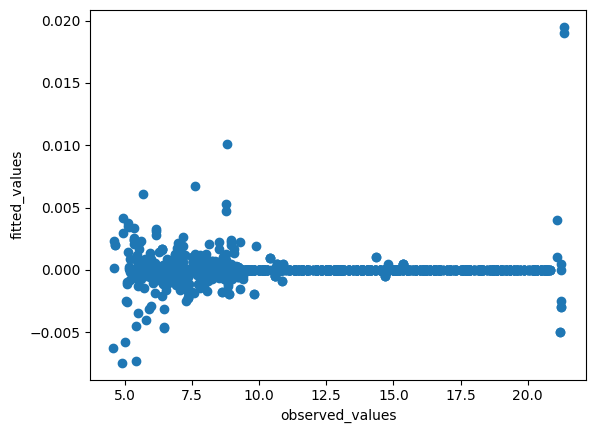

In [40]:
test_res=y_test-y_pred
plt.scatter(y_test,test_res)
plt.xlabel("observed_values")
plt.ylabel("fitted_values")
plt.show()

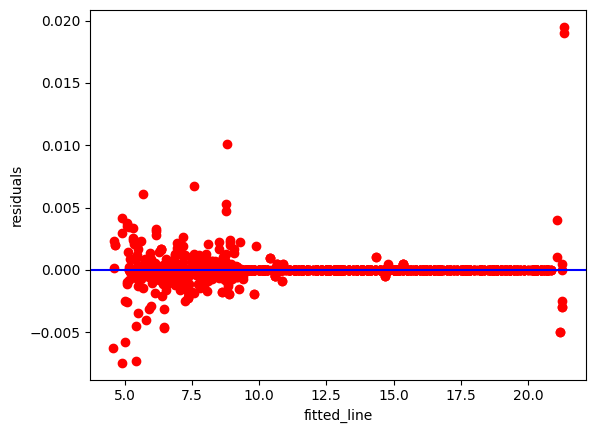

In [41]:
plt.scatter(y_pred,test_res,c='r')
plt.axhline(y=0,color='blue')
plt.xlabel("fitted_line")
plt.ylabel('residuals')
plt.show()

# 8.Hyper parameter tuning 

Doing for the dataset is overfiting so by using the Hyper parameter tuning to evaluate from the over fitting

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Splitting data into features (X) and target variable (y)
X=df1.iloc[:,:-1].values
y=df1.iloc[:,1].values
    

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Linear Regression model
model = LinearRegression()

# Define the hyperparameters to tune (Linear Regression does not have hyperparameters)

# Define the grid search with cross-validation
grid_search = GridSearchCV(model, {}, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Test MSE:", mse)
print("Linear Regression Test MAE:",mae)
print("Linear Regression Test RMSE:",rmse)
print("Linear Regression Test R2:",r2)


Linear Regression Test MSE: 4.701218598298848e-26
Linear Regression Test MAE: 2.1667559832680807e-13
Linear Regression Test RMSE: 2.168229369393111e-13
Linear Regression Test R2: 1.0


In [43]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Splitting data into features (X) and target variable (y)
X=df1.iloc[:,:-1].values
y=df1.iloc[:,1].values
    
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Decision Tree Regressor model
model = DecisionTreeRegressor(random_state=0)

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

# Define the grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("Linear Regression Test MSE:", mse)
print("Linear Regression Test MAE:",mae)
print("Linear Regression Test RMSE:",rmse)
print("Linear Regression Test R2:",r2)


Linear Regression Test MSE: 4.606106781241752e-06
Linear Regression Test MAE: 0.00012040367710168682
Linear Regression Test RMSE: 0.0021461842374879544
Linear Regression Test R2: 0.9999997332509953


# 2.1. Loading the test dataset 

In [44]:
dataframe2=pd.read_csv("test_AbJTz2l.csv")

# 2.2.Applying some basic operations of pandas

In [45]:
dataframe2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [46]:
dataframe2.shape

(5681, 11)

In [47]:
dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [48]:
dataframe2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,4705.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.664849,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,8.645000,0.027047,94.412000,1987.000000
50%,12.500000,0.054154,141.415400,1999.000000
75%,16.700000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [49]:
dataframe2.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

# 2.3.Handling the null values

In [50]:
dataframe2.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [51]:
dataframe2['Item_Weight']=dataframe2['Item_Weight'].fillna(dataframe2['Item_Weight'].mean())

In [52]:
dataframe2['Outlet_Size']=dataframe2['Outlet_Size'].fillna('unknown')

In [53]:
dataframe2.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

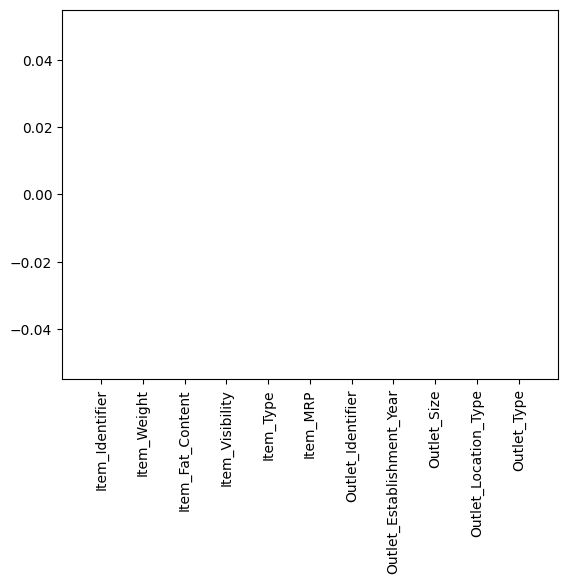

In [54]:
null=dataframe2.isnull().sum()
plt.bar(null.index,null.values)
plt.xticks(rotation=90)
plt.show()

# 2.4.checking the outliers 

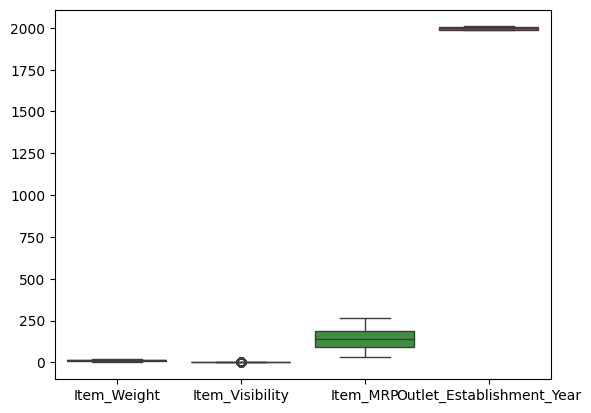

In [55]:
sns.boxplot(data=dataframe2)
plt.show()

In [56]:
# Calculate the interquartile range (IQR)
Q1 = dataframe2['Outlet_Establishment_Year'].quantile(0.25)
Q3 = dataframe2['Outlet_Establishment_Year'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = ((dataframe2['Outlet_Establishment_Year'] < lower_bound) | (dataframe2['Outlet_Establishment_Year'] > upper_bound)).sum()

# Calculate the percentage of outliers
outliers_percentage = (outliers_count / len(dataframe)) * 100

print("Percentage of outliers:", outliers_percentage)


Percentage of outliers: 0.0


In [57]:
dataframe2.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

# 2.5.label encoding 

In [58]:
cat = dataframe2.select_dtypes(include='O')
le = LabelEncoder()

for i in cat:
    dataframe2[i] = le.fit_transform(dataframe2[i])
    
dataframe2

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,3,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,1,0.073529,8,118.7440,7,2002,3,1,1
5679,517,15.300000,2,0.000000,3,214.6218,2,2007,3,1,1


# Decision tree predictions

In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming you have loaded your train and test datasets into train_df and test_df

# Step 1: Splitting data into features (X) and target variable (y)
X_train = df1.drop('Item_Outlet_Sales', axis=1)  # Assuming 'target_column_name' is the name of your target variable
y_train = df1['Item_Outlet_Sales']

# Step 2-3: Creating and training the Decision Tree Regressor model
model = DecisionTreeRegressor()  # You can adjust hyperparameters as needed
model.fit(X_train, y_train)

# Step 4: Making predictions on the test data
pred = model.predict(dataframe2)
pred



array([1031.99  ,  491.3604,  759.012 , ..., 2664.5316, 2143.876 ,
       1090.5804])

In [60]:
from sklearn.tree import DecisionTreeRegressor

# Assuming df1 is your training dataset and dataframe2 is your test dataset

# Separate features (X) and target variable (y) for training dataset
X_train = df1.drop('Item_Outlet_Sales', axis=1)  # Replace 'target_column_name' with the name of your target column
y_train = df1['Item_Outlet_Sales']

# Create Decision Tree Regressor
dt_regressor = DecisionTreeRegressor()

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict on the test features
X_test = dataframe2  # Assuming all features are present in dataframe2
predictions = dt_regressor.predict(X_test)

# If actual target values are available for evaluation, you can compare predictions with actual values
# Otherwise, predictions can be used for inference but not for evaluation


In [61]:
predictions

array([1031.99  ,  729.7168,  523.3188, ..., 2664.5316, 2143.876 ,
       1649.8524])

# linear regression

In [63]:
X_train = df1.drop('Item_Outlet_Sales', axis=1)  # Replace 'target_column_name' with the name of your target column
y_train = df1['Item_Outlet_Sales']
model=LinearRegression()
model.fit(X_train,y_train)
res=model.predict(dataframe2)
res

array([1928.46157633, 1162.93789551, 2157.27477751, ..., 1718.7351746 ,
       2920.50307546, 1173.99274018])